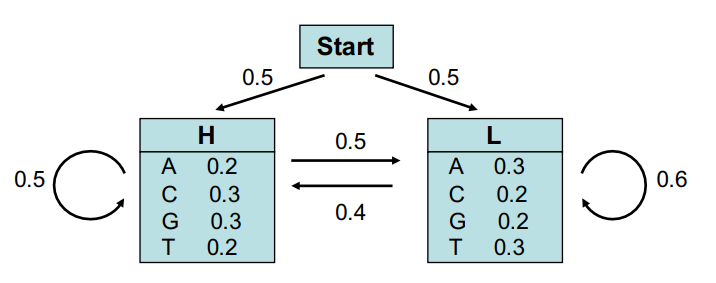

In [ ]:
import numpy as np
import math
import time

In [ ]:
estados={'SH':0.5,'SL':0.5,'HH':0.5,'HL':0.5,'LH':0.4,'LL':0.6}
P={'HA':0.2,'HC':0.3,'HG':0.3,'HT':0.2,'LA':0.3,'LC':0.2,'LG':0.2,'LT':0.3}
PD={}

# **Viterbi algorithm**

In [ ]:
cadena='GGCACTGAA'
#cadena='GGTCCAACATAGGCGTAAACTACGATGGCACCAACTCAGTCGCAGCTCGTGCGCCGTGAATAACGTACTCATCCCAACTGATTCTCGGCAATCTACGGAGCGACATGATTATCAACAGCTGTCTAGCAGTTCTAATCTTTTGCCATCGTCGTAAAAGCCTCCAAGAGATTGATCATACCTATCGGCACAGAAGTGACACGACGCCGATGGGTAGCGGACTTTTGGTCAACCACAATTCGCTAGGGGACAGGTCCTGCGGCGTACATCACTTTGTATGTGCAACCAGCCCAAGTGGGGCCAGGCAAGACTCAGCTGGTTCCTGTGTTAGCTCGAGGCTAGGGATGACAGCTCTTTAAACATAGGCTGGGGGCGTCGAACGGTCGAGAAGCTCATAGTACCTCGGGTACCAACTTACTCAGGCTATTGCTTGAAGCTGTACTATTTCAGGGGGGGAGCGCTGATGGTCTCTTCTTCTGATGACTCAACTCGCAAGGGTCGTGAAGTCGGTTCCTTCAATGGTTAAAAATCAAAGGCTCACTGTGCAGACTGGAGCGCCCATCTAGCGGCTCGCGTCTCGAATGCTCGGTCCCCTTTGTCATTCCGGATAAATTCATACCCCTCATTCACTAGCTTGCGAAGTCTACATTGGTATATGAATCCGACCTAGAAGAGGGCACTTAAAATTGGGAGTGGTTGATGCTCTATACTCCATTCGGTTTTTTCGTGCATCACCGCGAGAGGCTGACAAGGGTTTGACATTGAGTAGCAAGGCACTTCCGGACTCAATGAAGGGCCGGGAAAGGTACGCGCGTGGTATGGGAGGATCAAGGAGCCAATACAAAGGCTTCATCCTCACTCGCATGGAGGCAAACGCAGAACAATGGTTACTATTTCGATACGTGAAACATGTCCCACGGTAGCCCAAAGACTTAAGAGTCTATCACCCCTAGGGCCCTTTCCCGGATATAAACGCCAGGTTGAATCCGCATTTGGAGCTACG'
cadenastr=list(cadena)

#Caso base
EH=estados['SH']
EL=estados['SL']
VH=P[('H'+cadenastr[0])]
VL=P[('L'+cadenastr[0])]
PH=np.log2(EH)+np.log2(VH)
PL=np.log2(EL)+np.log2(VL)


if PH>PL:
  Eactual='H'
  Pfin=PH
else:
  Eactual='L'
  Pfin=PL

Resp=Eactual

Para hacer uso del caso sin memoria o con memoria, por favor comentar el caso que no desea usar y descomentar el que se desea usar

In [ ]:
start_time = time.time()
for i in range(1, len(cadenastr)):

  #CASO CON MEMORIA, se guardan los valores para no tener que estar calculándolos
  #'''
  if (Eactual+"H"+cadenastr[i]) in PD:
    VH=PD[(Eactual+"H"+cadenastr[i])]
  else:
    #print("Creando Probabilidad:"+Eactual+"-H-"+cadenastr[i])
    VH=np.log2(estados[(Eactual+'H')])+np.log2(P[('H'+cadenastr[i])])
    PD[Eactual+"H"+cadenastr[i]] = VH

  if (Eactual+"L"+cadenastr[i]) in PD:
    VL=PD[(Eactual+"L"+cadenastr[i])]
  else:
    #print("Creando Probabilidad:"+Eactual+"-L-"+cadenastr[i])
    VL=np.log2(estados[(Eactual+'L')])+np.log2(P[('L'+cadenastr[i])])
    PD[Eactual+"L"+cadenastr[i]] = VL  
  #'''

  #CASO SIN MEMORIA no se guardan los valores
  '''
  VH=np.log2(estados[(Eactual+'H')])+np.log2(P[('H'+cadenastr[i])])
  #print("Creando Probabilidad:"+Eactual+"-H-"+cadenastr[i])
  VL=np.log2(estados[(Eactual+'L')])+np.log2(P[('L'+cadenastr[i])])
  #print("Creando Probabilidad:"+Eactual+"-L-"+cadenastr[i])
  '''

  PH=Pfin+VH
  PL=Pfin+VL 

  if PH>PL:
    Eactual='H'
    Pfin=PH
  else:
    Eactual='L'
    Pfin=PL
  Resp=Resp+Eactual

print("--- %s seconds ---" % (time.time() - start_time))
Prob=2**Pfin
print("El camino más probable para la secuencia ",cadena,"es: ",Resp,"con la probabilidad ",Prob)

--- 0.0003161430358886719 seconds ---
El camino más probable para la secuencia  GGCACTGAA es:  HHHLLLLLL con la pronbabilidad  4.251528000000011e-08


El algoritmo que tiene ahorro de memoria se demora menos tiempo y tiene un mejor ajuste, esto teniendo en cuenta que las probabilidades de transición son pocas y para este ejemplo con cadenas significativamente grandes se tiene una disminución de tiempo

In [ ]:
PD

{'HHA': -3.321928094887362,
 'HHC': -2.736965594166206,
 'HHG': -2.736965594166206,
 'HLA': -2.736965594166206,
 'HLC': -3.321928094887362,
 'HLG': -3.321928094887362,
 'LHA': -3.6438561897747244,
 'LHC': -3.0588936890535683,
 'LHG': -3.0588936890535683,
 'LHT': -3.6438561897747244,
 'LLA': -2.473931188332412,
 'LLC': -3.0588936890535683,
 'LLG': -3.0588936890535683,
 'LLT': -2.473931188332412}

# **Foward algorithm**

In [ ]:
PH=[]
PL=[]

cadena="GGCA"
cadenastr=list(cadena)

#Caso base
EH=estados['SH']
EL=estados['SL']
VH=P[('H'+cadenastr[0])]
VL=P[('L'+cadenastr[0])]
PH.append(EH*VH)
PL.append(EL*VL)

In [ ]:
for i in range(1, len(cadenastr)):
  PH2=estados[('H'+'H')]*P[('H'+cadenastr[i])]*PH[i-1]+estados[('L'+'H')]*P[('H'+cadenastr[i])]*PL[i-1]
  PL2=estados[('H'+'L')]*P[('L'+cadenastr[i])]*PH[i-1]+estados[('L'+'L')]*P[('L'+cadenastr[i])]*PL[i-1]
  PH.append(PH2)
  PL.append(PL2)

Prob=PH[len(cadenastr)-1]+PL[len(cadenastr)-1]
print("La probabilidad de la cadena ", cadena,"es: ",Prob)

La probabilidad de la cadena  GGCA es:  0.003843149999999999
